# Theoretical Peak Analysis

This notebook derives and calculates the theoretical location of the peak density ("caustic") observed in the scaled distribution histogram. The peak arises due to the interplay between the probability density of the underlying variable and the compression caused by a decreasing scale factor.

## 1. Mathematical Derivation

Let $X \sim \mathcal{N}(0, 1)$ with PDF $\phi(x)$.
We define the scaled variable $Y$ as a deterministic transformation of $X$:

$$ Y = g(x) = x \cdot S(\Phi(x)) $$

where $S(u)$ is the piecewise linear scale factor function.

### Change of Variables
The probability density function (PDF) of $Y$, denoted $f_Y(y)$, is given by the change-of-variable formula:

$$ f_Y(y) = \frac{f_X(x)}{| g'(x) |} = \frac{\phi(x)}{| g'(x) |} $$

where $x = g^{-1}(y)$. To find the peak density, we look for the value $y$ (and corresponding $x$) that maximizes this ratio.

### Derivative of the Transformation
We differentiate $g(x)$ with respect to $x$ using the chain rule:

$$ g'(x) = S(\Phi(x)) + x \cdot \frac{d}{dx} S(\Phi(x)) $$

Since $S(u) = A + K \cdot u$ within each linear region (where $K$ is the slope $\frac{\Delta f}{\Delta u}$):

$$ \frac{d}{dx} S(\Phi(x)) = S'(\Phi(x)) \cdot \Phi'(x) = K \cdot \phi(x) $$

Substituting this back:

$$ g'(x) = S(\Phi(x)) + x \cdot K \cdot \phi(x) $$

### The "Pile-Up" Condition
The density $f_Y(y)$ spikes when the derivative $g'(x)$ is small. This happens when the scale factor is decreasing ($K < 0$), causing the term $x \cdot K \cdot \phi(x)$ to be negative, which subtracts from the positive base scale $S(\Phi(x))$. This "slowing down" of the transformation compresses the probability mass into a narrow range of $y$.

Searching for density peak in Region 2 and 3...


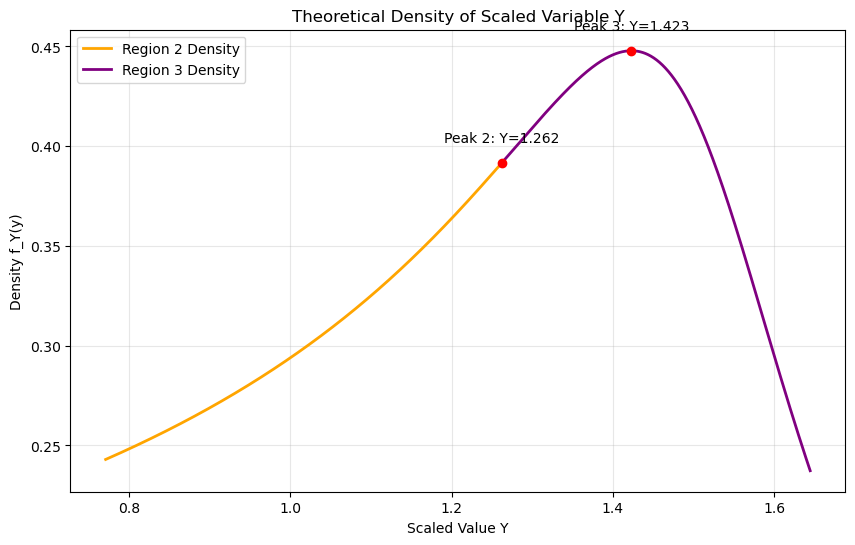

Region 2 Peak: Density=0.3918 at Y=1.2624 (from X=0.8416)
Region 3 Peak: Density=0.4479 at Y=1.4229 (from X=1.1182)

Global Theoretical Peak is in Region 3 at Y ≈ 1.4229


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def find_theoretical_peak():
    # Parameters provided by user
    f65 = 2.0
    f80 = 1.5
    f95 = 1.0
    
    # Define interpolation slopes K = df / du
    K2 = (f80 - f65) / 0.15 # Region 2
    K3 = (f95 - f80) / 0.15 # Region 3
    
    # Quantile boundaries
    x65 = norm.ppf(0.65)
    x80 = norm.ppf(0.80)
    x95 = norm.ppf(0.95)
    
    # Define functions for density calculation
    def get_density_profile(x_vals, f_start, u_start, K):
        densities = []
        y_vals = []
        for x in x_vals:
            u = norm.cdf(x)
            phi = norm.pdf(x)
            
            # S(u)
            s = f_start + K * (u - u_start)
            
            # g(x) = x * S(Phi(x))
            y = x * s
            
            # g'(x) = S(u) + x * S'(u) * u'(x)
            #       = s + x * K * phi
            g_prime = s + x * K * phi
            
            # density = phi(x) / |g'(x)|
            # Add small epsilon to avoid division by zero if slope flattens completely
            density = phi / (np.abs(g_prime) + 1e-9)
            
            densities.append(density)
            y_vals.append(y)
            
        return np.array(y_vals), np.array(densities)

    print(f"Searching for density peak in Region 2 and 3...")
    
    # --- Analyze Region 2 (65% -> 80%) ---
    x_r2 = np.linspace(x65, x80, 1000)
    y_r2, d_r2 = get_density_profile(x_r2, f65, 0.65, K2)
    max_d2_idx = np.argmax(d_r2)
    
    # --- Analyze Region 3 (80% -> 95%) ---
    x_r3 = np.linspace(x80, x95, 1000)
    y_r3, d_r3 = get_density_profile(x_r3, f80, 0.80, K3)
    max_d3_idx = np.argmax(d_r3)

    # --- Plotting ---
    plt.figure(figsize=(10, 6))
    plt.plot(y_r2, d_r2, label='Region 2 Density', color='orange', linewidth=2)
    plt.plot(y_r3, d_r3, label='Region 3 Density', color='purple', linewidth=2)
    
    # Mark Peaks
    plt.scatter([y_r2[max_d2_idx]], [d_r2[max_d2_idx]], color='red', zorder=5)
    plt.text(y_r2[max_d2_idx], d_r2[max_d2_idx]+0.01, f"Peak 2: Y={y_r2[max_d2_idx]:.3f}", ha='center')
    
    plt.scatter([y_r3[max_d3_idx]], [d_r3[max_d3_idx]], color='red', zorder=5)
    plt.text(y_r3[max_d3_idx], d_r3[max_d3_idx]+0.01, f"Peak 3: Y={y_r3[max_d3_idx]:.3f}", ha='center')
    
    plt.title("Theoretical Density of Scaled Variable Y")
    plt.xlabel("Scaled Value Y")
    plt.ylabel("Density f_Y(y)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # --- Global Max Printout ---
    print(f"Region 2 Peak: Density={d_r2[max_d2_idx]:.4f} at Y={y_r2[max_d2_idx]:.4f} (from X={x_r2[max_d2_idx]:.4f})")
    print(f"Region 3 Peak: Density={d_r3[max_d3_idx]:.4f} at Y={y_r3[max_d3_idx]:.4f} (from X={x_r3[max_d3_idx]:.4f})")
    
    if d_r2[max_d2_idx] > d_r3[max_d3_idx]:
        print(f"\nGlobal Theoretical Peak is in Region 2 at Y ≈ {y_r2[max_d2_idx]:.4f}")
    else:
        print(f"\nGlobal Theoretical Peak is in Region 3 at Y ≈ {y_r3[max_d3_idx]:.4f}")

find_theoretical_peak()